In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Bidirectional, Dense, BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, zero_one_loss
import matplotlib.pyplot as plt
import seaborn as sb

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
print('X_train shape: ' + str(X_train.shape)) # from this shape it is a single channel image
                                              # and we have 28 (time step) * 28 (features)
print('y_train shape: ' + str(y_train.shape)) 
print('X_test shape: ' + str(X_test.shape))
print('y_test shape: ' + str(y_test.shape), '\n')

print('print the first image: \n' + str(X_train[0]), '\n') # there is a need to normalize
print('max pixal value through all images: ' + str(X_train.max()))
print('print the first label: ' + str(y_train[0]))
print('unique range for labels: ' + str(np.unique(y_train))) # can we use set

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,) 

print the first image: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 2

In [16]:
X_train = (X_train / float(X_train.max()))
X_test = (X_test / float(X_train.max()))

print('print the first image after normalizetion: \n' + str(X_train[0]))

print the first image after normalizetion: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         

<Axes: ylabel='count'>

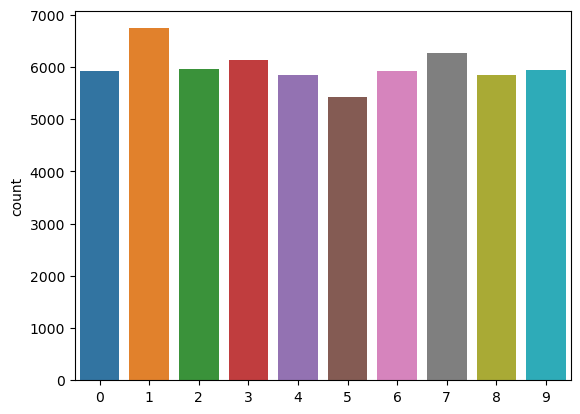

In [3]:
sb.countplot(x = y_train)

<Axes: ylabel='count'>

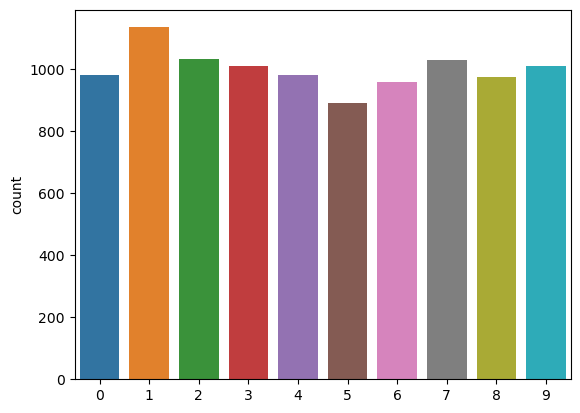

In [4]:
sb.countplot(x = y_test)

In [5]:
model = Sequential()
model.add(BatchNormalization())

model.add(Bidirectional(LSTM(256, activation = 'relu', input_shape = (28, 28, 1))))
# model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5, batch_size = 128)

y_pred = model.predict(X_test)

model.summary()

Epoch 1/5
469/469 [==============================] - 61s 123ms/step - loss: 0.3705 - accuracy: 0.8854 - val_loss: 0.1298 - val_accuracy: 0.9613
Epoch 2/5
469/469 [==============================] - 55s 116ms/step - loss: 0.0808 - accuracy: 0.9750 - val_loss: 0.0858 - val_accuracy: 0.9778
Epoch 3/5
469/469 [==============================] - 55s 118ms/step - loss: 0.0582 - accuracy: 0.9819 - val_loss: 0.0540 - val_accuracy: 0.9848
Epoch 4/5
469/469 [==============================] - 61s 129ms/step - loss: 0.0418 - accuracy: 0.9876 - val_loss: 0.0584 - val_accuracy: 0.9826
Epoch 5/5
313/313 [==============================] - 5s 13ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28)           112       
 ormalization)                                                   
                                                                 
 bidirec

In [13]:
# model.save('/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Pattern Project/model.h5')

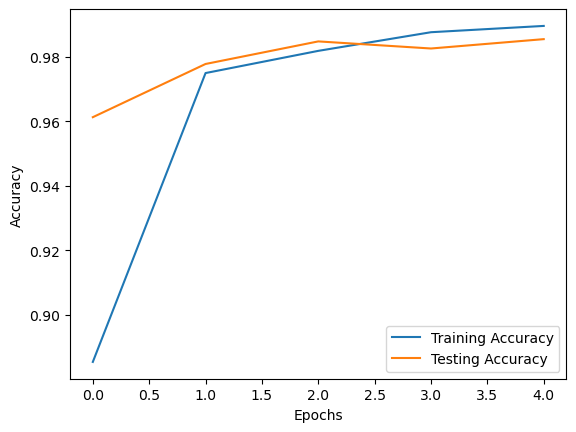

In [6]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

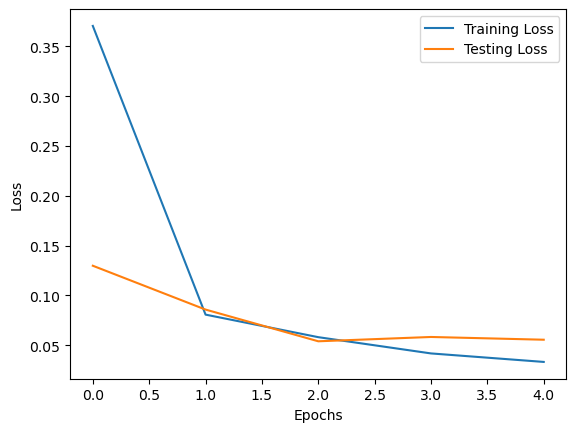

In [7]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
print(y_test[:20], '\n')

predict = []
for i in range(len(y_pred)): 
  predict.append(np.argmax(y_pred[i]))

print(np.array(predict[:20]), '\n')
print(np.round(y_pred[:20]), '\n')

cm = confusion_matrix(y_test, predict)
print(cm, '\n')

zol = zero_one_loss(y_test, predict, normalize = False)
print(zol)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4] 

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4] 

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 

[[ 971    0    0    0    0    1    4    1    3    0]
 [   0 1132    1    0    0    0    0    2    0    0]
 [   2    3 1011    6    0    1    1    4    4    0]
 [   0    0    4  993    0    4    0    4    0    5]
 [   0    0    0    0  964    1    4 

<Figure size 500x500 with 0 Axes>

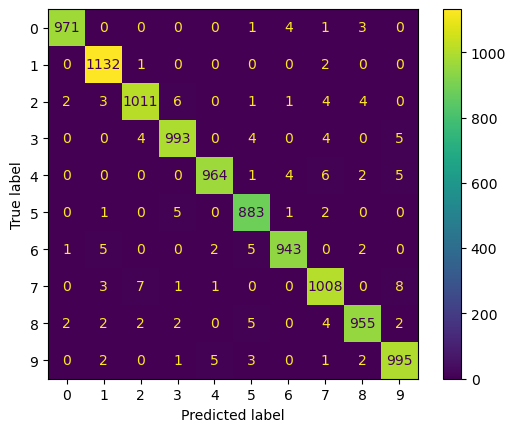

In [9]:
plt.figure(figsize = (5,5))
ConfusionMatrixDisplay(cm).plot()
plt.show()

<Axes: ylabel='count'>

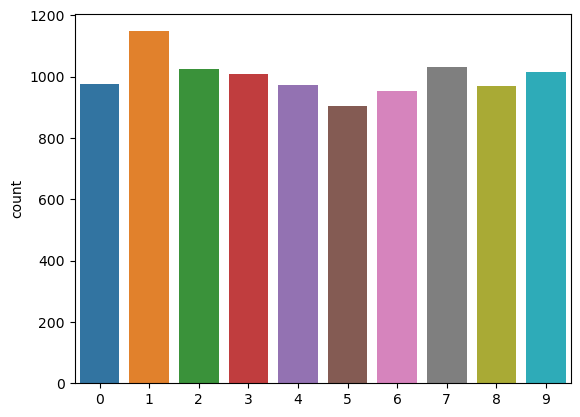

In [10]:
sb.countplot(x = predict)